In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
income_level = {"income": {"<=50K": 0, ">50K": 1}}

In [4]:
data.replace(income_level, inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [11]:
#import pandas_profiling as pp
#report = pp.ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#report.to_file('profile_report1.html')

In [12]:
income_us = data[data['native-country'] == 'United-States']['income']
income_non_us = data[data['native-country'] != 'United-States']['income']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [14]:
data = pd.get_dummies(data, columns=["workclass", 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [15]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
data = data.drop(['fnlwgt'], axis = 1)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X = data.drop(['income'], axis = 1)
X.head(3)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
y = data['income']

In [20]:
model = LogisticRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
model.fit(X_train, y_train)

/Users/svetlana/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.metrics import roc_curve

In [24]:
predictions = model.predict(X_test)

In [25]:
fpr, tpr, thres = roc_curve( y_test, predictions)

In [26]:
from matplotlib import pyplot as plt

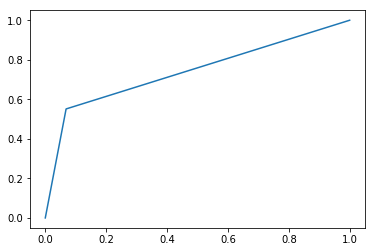

In [27]:
plt.plot( fpr, tpr )

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
roc_auc_score(y_test, predictions)

0.7414718901569162

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [31]:
fpr, tpr, thres = roc_curve( y_test, predictions)

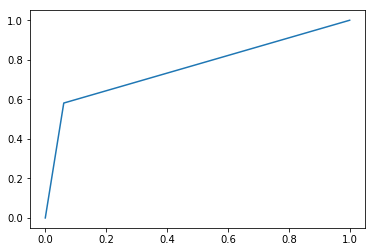

In [32]:
plt.plot( fpr, tpr )

In [33]:
roc_auc_score(y_test, predictions)

0.7602080379380114

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
predictions = classifier.predict(X_test)

In [41]:
fpr, tpr, thres = roc_curve( y_test, predictions)

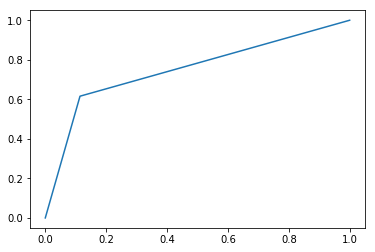

In [42]:
plt.plot( fpr, tpr )

In [43]:
roc_auc_score(y_test, predictions)

0.7508674585596639